In [1]:
import numpy as np
# import scipy.ndimage as ndimage
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
plt.gray()

<Figure size 432x288 with 0 Axes>

In [4]:
import PIL
img=np.array(PIL.Image.open("18_cut.tif"))
# img=img[:-100,:,:]

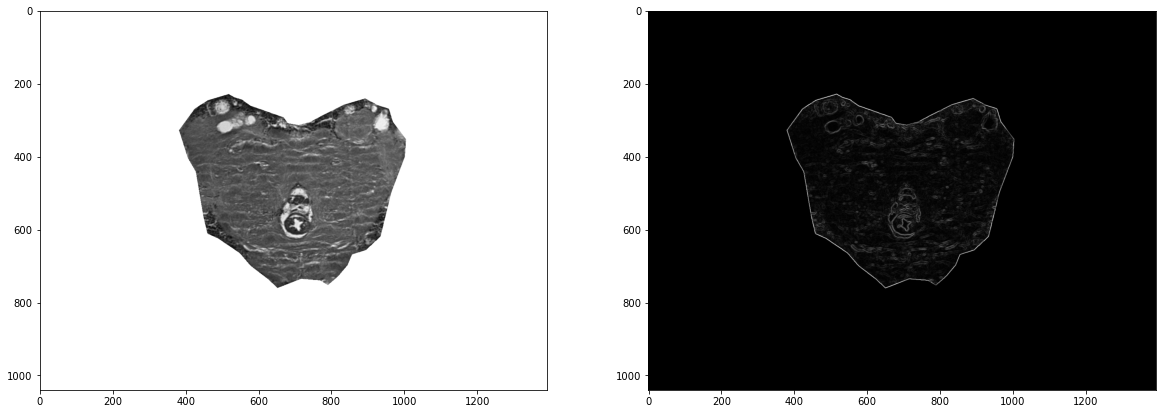

In [5]:
from skimage.filters import sobel
plt.figure(figsize=(20,10))

data=np.dot(img[...,:3],[.299,.587,.114])
# data=scipy.ndimage.minimum_filter(data,7)
dvalue=data[data>.01].flatten()
data[data<.01]=np.max(data)
elevation_map = sobel(data)

plt.subplot(1,2,1)
plt.imshow(data)
plt.subplot(1,2,2)
plt.imshow(elevation_map)



C:\Users\ruthb\anaconda3\lib\site-packages\skimage\morphology\_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


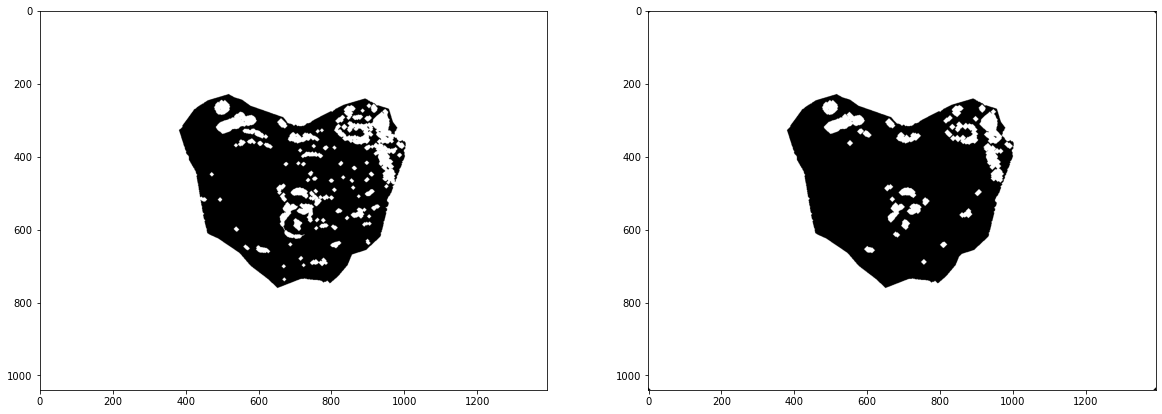

In [6]:
markers = np.zeros_like(data)


# data=scipy.ndimage.minimum_filter(data,7)
databin=data>(np.mean(dvalue)+.0*np.std(dvalue))


databin=scipy.ndimage.binary_opening(databin,iterations=5)
# 
markers[data < (np.mean(data)-0*np.std(data))] = 1
markers[databin] = 2

# plt.imshow(markers)
from skimage.morphology import watershed
segmentation = watershed(elevation_map, markers)-1


seg_open=scipy.ndimage.binary_opening(segmentation,iterations=7)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(segmentation)
plt.subplot(1,2,2)
plt.imshow(seg_open)


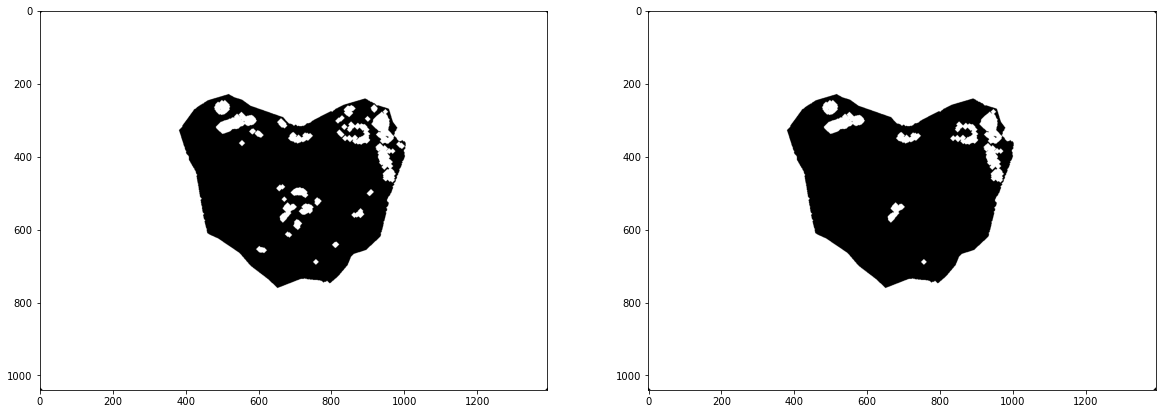

In [7]:
plt.figure(figsize=(20,10))

lab,nlb=scipy.ndimage.label(seg_open)
area=scipy.ndimage.sum(seg_open,lab,range(nlb))
seg_hideedge=seg_open.copy()
# for a in np.where(area>25000)[0]:
#     seg_hideedge[lab == a]=0
for a in np.where(area<1000)[0]:
    seg_hideedge[lab == a]=0

plt.subplot(1,2,1)
plt.imshow(seg_open)
plt.subplot(1,2,2)
plt.imshow(seg_hideedge)
#scipy.misc.imsave('outfile.jpg', seg_hideedge)

# lab
# plt.imshow()
# pts=np.array(scipy.ndimage.center_of_mass(data,lab,range(nlb))).astype(int)
# # pts=pts.astype(np.uint16)
# sds=np.zeros_like(data)
# for p in pts: sds[p[0],[[1]]]=1
# print np.sum(sds)

In [ ]:
import numpy as np

plt.figure(figsize=(20,10),frameon=False)
toshow=np.transpose(np.array([seg_hideedge*0,seg_hideedge*0,seg_hideedge*1,seg_hideedge*0+1]),(1,2,0))
print np.shape(toshow)
print np.shape(img)
plt.imshow(toshow)
plt.hold(True)
plt.imshow(img,alpha=.7)



In [ ]:
# print np.sum(seg_hideedge==1)/np.sum(seg_hideedge==0)
edge=float((len(data.flatten())-len(dvalue)))
print float(np.sum(seg_hideedge==1)-edge)/float(len(dvalue))